In [ ]:
#!pip install ultralytics opencv-python matplotlib seaborn


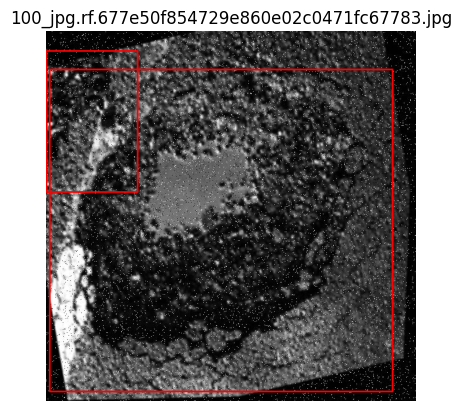

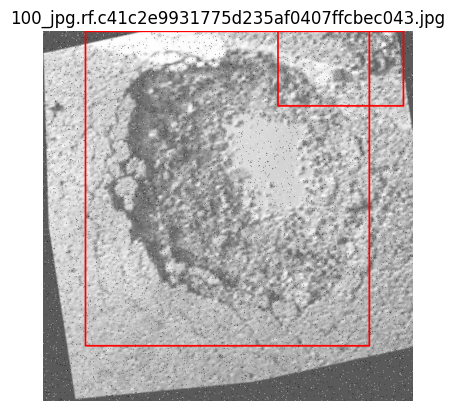

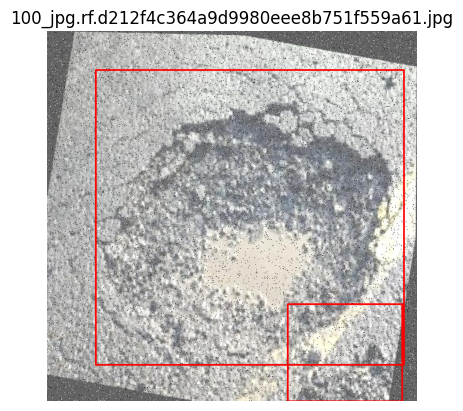

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

image_path = r"C:\Users\yashp\PotHole Detection\train\images"
label_path = r"C:\Users\yashp\PotHole Detection\train\labels"

image_files = os.listdir(image_path)
label_files = os.listdir(label_path)

# Sample image with bbox
def show_image_with_bbox(img_file):
    img = cv2.imread(f"{image_path}/{img_file}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label_file = f"{label_path}/{img_file.replace('.jpg', '.txt')}"
    h, w, _ = img.shape
    if os.path.exists(label_file):
        with open(label_file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                class_id, x_center, y_center, bbox_w, bbox_h = map(float, line.strip().split())
                x1 = int((x_center - bbox_w/2) * w)
                y1 = int((y_center - bbox_h/2) * h)
                x2 = int((x_center + bbox_w/2) * w)
                y2 = int((y_center + bbox_h/2) * h)
                cv2.rectangle(img, (x1,y1), (x2,y2), (255,0,0), 2)
    plt.imshow(img)
    plt.title(img_file)
    plt.axis('off')
    plt.show()

# Show a few examples
for img_file in image_files[:3]:
    show_image_with_bbox(img_file)


In [3]:
from ultralytics import YOLO

# Load YOLOv8 model 
model = YOLO('yolov8s.pt')

# Train model
results = model.train(
    data='data.yaml',
    epochs=35,
    patience=5,
    imgsz=640,
    batch=16,
    device=0  # Set to 0 to use GPU
)


New https://pypi.org/project/ultralytics/8.3.146 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.99  Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=35, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frame

train: Scanning C:\Users\yashp\PotHole Detection\train\labels.cache... 2067 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2067/2067 [00:00<?, ?it/s]
val: Scanning C:\Users\yashp\PotHole Detection\valid\labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train3
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35      3.71G      1.863      2.502       1.95         11        640: 100%|██████████| 130/130 [00:30<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all         16         25      0.342       0.44      0.341      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35      3.76G      1.887      2.187       1.99          3        640: 100%|██████████| 130/130 [00:28<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.82it/s]

                   all         16         25       0.79       0.24      0.303      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      3.79G      1.874      2.179      2.004         12        640: 100%|██████████| 130/130 [00:27<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]

                   all         16         25      0.733       0.28      0.368       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35       3.8G      1.823      2.071      1.948         14        640: 100%|██████████| 130/130 [00:27<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]

                   all         16         25      0.443       0.16      0.202     0.0771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      3.83G      1.768      1.995      1.907          5        640: 100%|██████████| 130/130 [00:27<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all         16         25       0.53       0.52      0.431      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35      3.86G      1.775      1.971      1.887          8        640: 100%|██████████| 130/130 [00:27<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all         16         25      0.439       0.56      0.437      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35      3.86G      1.692      1.853      1.828         15        640: 100%|██████████| 130/130 [00:27<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.30it/s]

                   all         16         25      0.413       0.56      0.441      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      3.86G      1.693      1.788      1.824         14        640: 100%|██████████| 130/130 [00:27<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.09it/s]

                   all         16         25      0.741       0.48      0.598      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35      3.86G      1.683      1.748      1.815         22        640: 100%|██████████| 130/130 [00:27<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]

                   all         16         25      0.725      0.633      0.616      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35      3.86G      1.648      1.737        1.8          5        640: 100%|██████████| 130/130 [00:27<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         16         25      0.685       0.64      0.645      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35      3.86G      1.624      1.654      1.765         11        640: 100%|██████████| 130/130 [00:27<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.03it/s]

                   all         16         25      0.753       0.56      0.557      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35      3.86G      1.608      1.606      1.756         16        640: 100%|██████████| 130/130 [00:27<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.29it/s]

                   all         16         25      0.883       0.64      0.718      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      3.86G       1.59      1.588       1.74         14        640: 100%|██████████| 130/130 [00:27<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all         16         25      0.881      0.594      0.781      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35      3.86G      1.579      1.567      1.724         10        640: 100%|██████████| 130/130 [00:27<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all         16         25      0.794       0.72      0.629      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35      3.86G      1.566       1.52      1.713          6        640: 100%|██████████| 130/130 [00:27<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]

                   all         16         25      0.754       0.64      0.695      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35      3.86G      1.573      1.508       1.71         13        640: 100%|██████████| 130/130 [00:27<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.50it/s]

                   all         16         25      0.643        0.8      0.707      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35      3.86G      1.544      1.482      1.705          9        640: 100%|██████████| 130/130 [00:27<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.57it/s]

                   all         16         25       0.87       0.56      0.705      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      3.86G      1.542      1.453      1.698         13        640: 100%|██████████| 130/130 [00:27<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         16         25      0.867        0.6      0.733      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35      3.86G      1.523      1.449      1.704         11        640: 100%|██████████| 130/130 [00:26<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]

                   all         16         25      0.863       0.56      0.682      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      3.86G      1.516      1.435      1.687          7        640: 100%|██████████| 130/130 [00:27<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all         16         25      0.774       0.72      0.751      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35      3.86G      1.503      1.422      1.675          7        640: 100%|██████████| 130/130 [00:27<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.32it/s]

                   all         16         25      0.893       0.67      0.815      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      3.86G      1.493      1.379      1.664         12        640: 100%|██████████| 130/130 [00:27<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all         16         25      0.668       0.84      0.802        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35      3.87G      1.458       1.33      1.639         10        640: 100%|██████████| 130/130 [00:27<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all         16         25      0.849       0.72      0.744      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35      3.89G      1.441      1.295      1.616         14        640: 100%|██████████| 130/130 [00:27<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.32it/s]

                   all         16         25      0.604       0.72      0.721      0.249
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 19, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



24 epochs completed in 0.189 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 22.5MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics 8.3.99  Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]


                   all         16         25      0.859       0.56      0.681      0.366
Speed: 0.2ms preprocess, 3.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\detect\train3


In [4]:
metrics = model.val()  # Evaluate on validation set
print(metrics)


Ultralytics 8.3.99  Python-3.12.9 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning C:\Users\yashp\PotHole Detection\valid\labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.55s/it]


                   all         16         25      0.863       0.56      0.681      0.365
Speed: 8.9ms preprocess, 23.0ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs\detect\train32
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001DF89088AD0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,   

In [5]:
# Save model
model_path = "best_model_pothole.pt"
model.save(model_path)

# Export to ONNX or TorchScript for frontend
model.export(format='torchscript')  # or format='onnx'


Ultralytics 8.3.99  Python-3.12.9 torch-2.6.0+cu124 CPU (AMD Ryzen 7 7435HS)

PyTorch: starting from 'runs\detect\train3\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (21.5 MB)

TorchScript: starting export with torch 2.6.0+cu124...
TorchScript: export success  1.6s, saved as 'runs\detect\train3\weights\best.torchscript' (42.9 MB)

Export complete (3.6s)
Results saved to C:\Users\yashp\PotHole Detection\runs\detect\train3\weights
Predict:         yolo predict task=detect model=runs\detect\train3\weights\best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs\detect\train3\weights\best.torchscript imgsz=640 data=data.yaml  
Visualize:       https://netron.app


'runs\\detect\\train3\\weights\\best.torchscript'

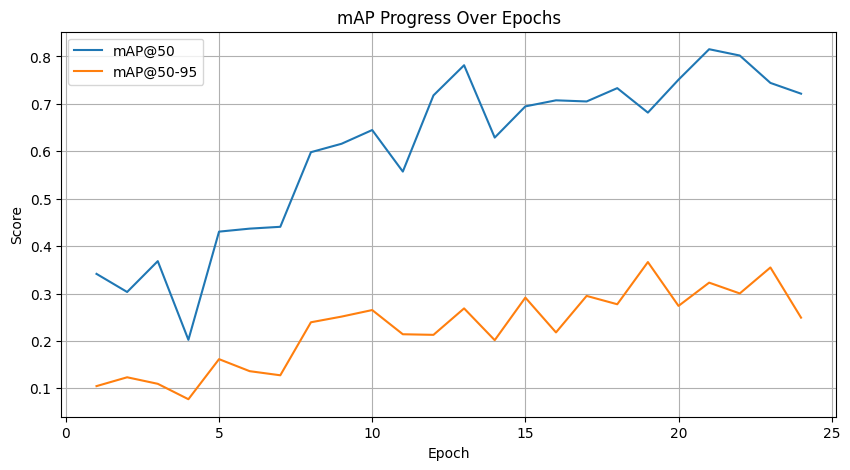

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

log_path = "runs/detect/train3/results.csv"
df = pd.read_csv(log_path)

# Strip all column names to remove hidden spaces
df.columns = df.columns.str.strip()

plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@50')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@50-95')
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("mAP Progress Over Epochs")
plt.legend()
plt.grid(True)
plt.show()



image 1/1 C:\Users\yashp\PotHole Detection\images.jpg: 448x640 5 potholes, 37.6ms
Speed: 2.4ms preprocess, 37.6ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict2


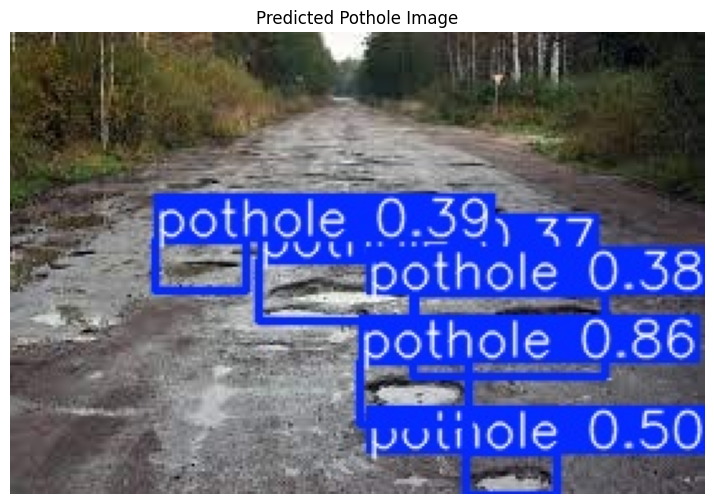

In [10]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load trained model
model = YOLO("runs/detect/train3/weights/best.pt")

# Run prediction and save results
results = model.predict(source=r"C:\Users\yashp\PotHole Detection\images.jpg", save=True)

# Fix: use os.path to construct the saved image path
save_dir = results[0].save_dir  # typically 'runs/detect/predict'
image_name = os.path.basename(results[0].path)  # 'images.jpg'
predicted_image_path = os.path.join(save_dir, image_name)

# Open and display the image
img = Image.open(predicted_image_path)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis("off")
plt.title("Predicted Pothole Image")
plt.show()




image 1/1 C:\Users\yashp\PotHole Detection\download (1).jpg: 448x640 3 potholes, 40.5ms
Speed: 5.5ms preprocess, 40.5ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict3


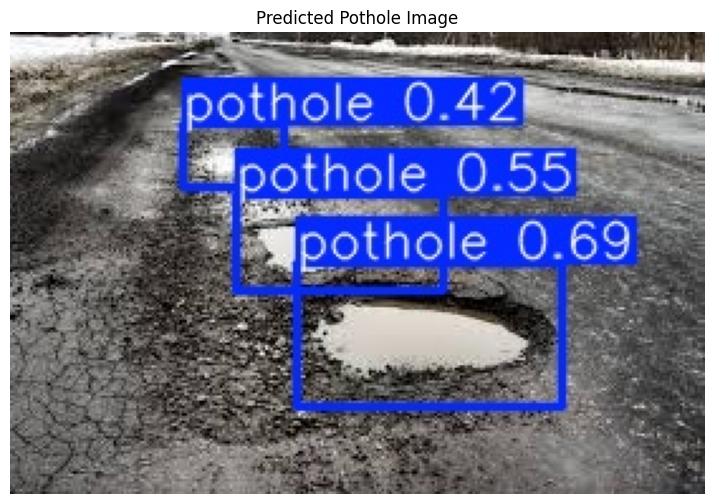

In [11]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import os

# Load trained model
model = YOLO("runs/detect/train3/weights/best.pt")

# Run prediction and save results
results = model.predict(source=r"C:\Users\yashp\PotHole Detection\download (1).jpg", save=True)

# Fix: use os.path to construct the saved image path
save_dir = results[0].save_dir  # typically 'runs/detect/predict'
image_name = os.path.basename(results[0].path)  # 'images.jpg'
predicted_image_path = os.path.join(save_dir, image_name)

# Open and display the image
img = Image.open(predicted_image_path)
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis("off")
plt.title("Predicted Pothole Image")
plt.show()


In [1]:
from ultralytics import YOLO
import cv2
import os

# Load trained model
model = YOLO("runs/detect/train3/weights/best.pt")

# Path to input video
input_video_path = r"C:\Users\yashp\PotHole Detection\Results\mixkit-potholes-in-a-rural-road-25208-hd-ready.mp4"
output_video_path = r"C:\Users\yashp\PotHole Detection\Results\output1.mp4"

# Open video
cap = cv2.VideoCapture(input_video_path)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)

# Create video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Predict on frame using YOLO
    results = model.predict(source=frame, conf=0.25, verbose=False)

    # Get annotated frame (with boxes drawn)
    annotated_frame = results[0].plot()

    # Write to output video
    out.write(annotated_frame)

    # Show live result
    cv2.imshow("YOLOv8 Pothole Detection", annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit early
        break

# Release everything
cap.release()
out.release()
cv2.destroyAllWindows()

print(f"✅ Prediction finished. Output saved at:\n{output_video_path}")


✅ Prediction finished. Output saved at:
C:\Users\yashp\PotHole Detection\Results\output1.mp4
